# Задание 02

## Тарасюк Юлия

![](got.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import pandas as pd

Будем изучать важность персонажей в книгах "A Song of Ice and Fire" (G.R.R. Martin). Два героя связаны ребром, если их имена появляются в тексте на расстоянии не более 15 слов в соответствующей книге. [Данные](https://github.com/mathbeveridge/asoiaf) находятся в открытом доступе для 5 книг.
Сеть -- взвешенная, вес ребра определяется числом взаимодействий (упоминаний в тексте).

In [2]:
book1 = pd.read_csv('asoiaf-book1-edges.csv')
book2 = pd.read_csv('asoiaf-book2-edges.csv')
book3 = pd.read_csv('asoiaf-book3-edges.csv')
book4 = pd.read_csv('asoiaf-book4-edges.csv')
book5 = pd.read_csv('asoiaf-book5-edges.csv')

In [3]:
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


#### Постройте сеть персонажей по первой книге. 

In [4]:
G1=nx.from_pandas_edgelist(book1,'Source', 'Target', edge_attr=True, create_using=nx.Graph())

In [5]:
print(list(G1.edges(data=True))[16]) # ребро в сети

('Jaime-Lannister', 'Loras-Tyrell', {'Type': 'Undirected', 'weight': 3, 'book': 1})


![](got.png)
![](got.png)
![](got.png)

#### 1.  Определите топ-10 персонажей по значению центральности по степени. Сколько среди них Старков? 

In [6]:
from operator import itemgetter

def sorted_centrality(G):
    d_cent=nx.degree_centrality(G)
    return sorted(d_cent.items(), key=itemgetter(1, 0), reverse=True)

In [7]:
item_sort = sorted_centrality(G1)
item_sort[:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Sansa-Stark', 0.18817204301075272),
 ('Robb-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Joffrey-Baratheon', 0.16129032258064518),
 ('Cersei-Lannister', 0.16129032258064518)]

In [77]:
sum(1 for (key, value) in item_sort[:10] if 'Stark' in key)

5

#### Ответ: 5 Старков

![](got.png)
![](got.png)
![](got.png)
![](got.png)

#### 2. Постройте функцию weighted_degree, учитывающую вес ребер: 

$$d_{w}^{i}=\sum_{j} w_{i,j},$$ где $w_{i,j}$ -- вес ребра $(i,j)$ ($w_{i,j}=0$, если нет ребра между вершинами $i$ и $j$).

#### Какое значение взвешенной степени у Eddard-Stark в сети?

In [8]:
def weighted_degree(name):
    return book1[(book1['Source'] == name) | (book1['Target'] == name)]['weight'].sum() 

In [9]:
weighted_degree('Eddard-Stark')

1284

#### Ответ: Значение у Eddard-Stark = 1284

Другой метод получить словарь, учитывающий вес рёбер

In [10]:
weight_degr = dict(G1.degree(weight='weight'))

![](got.png)
![](got.png)
![](got.png)
![](got.png)

#### 3. Сколько персонажей из топ-10, определенным по центральности по степени (из вопроса 1) осталось в топ-10 по взвешенной степени ? 

In [11]:
top_weight_degr = sorted(weight_degr.items(), key=itemgetter(1, 0), reverse=True)
top_weight_degr[:10]

[('Eddard-Stark', 1284),
 ('Robert-Baratheon', 941),
 ('Jon-Snow', 784),
 ('Tyrion-Lannister', 650),
 ('Sansa-Stark', 545),
 ('Bran-Stark', 531),
 ('Catelyn-Stark', 520),
 ('Robb-Stark', 516),
 ('Daenerys-Targaryen', 443),
 ('Arya-Stark', 430)]

In [78]:
inter = np.intersect1d(item_sort[:10], top_weight_degr[:10])
print(f'Осталось {inter.shape[0]} персонажей')
print(inter)

Осталось 8 персонажей
['Bran-Stark' 'Catelyn-Stark' 'Eddard-Stark' 'Jon-Snow' 'Robb-Stark'
 'Robert-Baratheon' 'Sansa-Stark' 'Tyrion-Lannister']


#### Ответ: Осталось 8 персонажей 

![](got.png)
![](got.png)
![](got.png)

#### 4. Постройте топ-10 персонажей  по значению центральности по посредничеству. 
Сравните с топ-10 по степени и по взвешенной степени. 
#### Какой новый персонаж появился в рейтинге?

In [82]:
def sorted_bcent(G):
    b_cent=nx.betweenness_centrality(G)
    return sorted(b_cent.items(), key=itemgetter(1, 0), reverse=True)

bcent_sort = sorted_bcent(G1)
bcent_sort[:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

In [83]:
first_ex = list(dict(item_sort[:10]).keys())
second_ex = list(dict(top_weight_degr[:10]).keys())
third_ex = list(dict(bcent_sort[:10]).keys())
print(f'Новый персонаж {np.setdiff1d(np.setdiff1d(third_ex, second_ex), first_ex)[0]}')

Новый персонаж Drogo


#### Ответ: Новый персонаж Drogo

![](got.png)
![](got.png)
![](got.png)

#### 5. Постройте топ-10 персонажей по значению центральности по посредничеству с учетом веса ребер. Кто теперь возглавляет список? 

In [17]:
b_cent_weight = nx.betweenness_centrality(G1, weight="weight")
sorted(b_cent_weight.items(), key=itemgetter(1), reverse=True)[:10]

[('Robert-Baratheon', 0.23341885664466297),
 ('Eddard-Stark', 0.18703429235687297),
 ('Tyrion-Lannister', 0.15311225972516293),
 ('Robb-Stark', 0.1024018949825402),
 ('Catelyn-Stark', 0.10169012330302643),
 ('Jon-Snow', 0.09027684366394043),
 ('Jaime-Lannister', 0.07745109164464009),
 ('Rodrik-Cassel', 0.07667992877670296),
 ('Drogo', 0.06894355184677767),
 ('Jorah-Mormont', 0.0627085149665795)]

In [85]:
sorted(b_cent_weight.items(), key=itemgetter(1), reverse=True)[:10][0][0]

'Robert-Baratheon'

#### Ответ: Robert-Baratheon

![](got.png)
![](got.png)
![](got.png)

####  6. Постройте топ-10 по значению PageRank (по умолчанию учетываются веса ребер). Какое место в топе  занимает Daenerys-Targaryen?

In [20]:
pr=nx.pagerank(G1, alpha=0.85)
def sorted_pr(G):
    pr=nx.betweenness_centrality(G)
    return sorted(pr.items(), key=itemgetter(1, 0), reverse=True)

rank_sort = sorted_pr(G1)
rank_sort[:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

In [21]:
result = np.where(np.array(list(dict(rank_sort).keys())) == 'Daenerys-Targaryen')
print(*result[0]+1)

6


#### Ответ: 6

![](got.png)
![](got.png)
![](got.png)

#### 7. Постройте рейтинг по значению центральности по степени для персонажей 5-ой книги. Какую теперь наивысшую строчку рейтинга занимает персонаж из Дома Старков?  

In [54]:
G5=nx.from_pandas_edgelist(book5,'Source', 'Target', edge_attr=True, create_using=nx.Graph())
d_sort = sorted_centrality(G5)
d_sort

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038),
 ('Ramsay-Snow', 0.05063291139240506),
 ('Quentyn-Martell', 0.05063291139240506),
 ('Mance-Rayder', 0.05063291139240506),
 ('Jon-Connington', 0.05063291139240506),
 ('Selyse-Florent', 0.04746835443037974),
 ('Robert-Baratheon', 0.04746835443037974),
 ('Doran-Martell', 0.04746835443037974),
 ('Daario-Naharis', 0.04746835443037974),
 ('Aegon-Targaryen-(son-of-Rhaegar)', 0.04746835443037974),
 ('Wyman-Manderly', 0.04430379746835443),
 ('Eddard-Stark', 0.04430379746835443),
 ('Davos-Seaworth', 0.04113924050632911),
 ('Skahaz-mo-Kandaq', 0.0379746835443038),
 ('Bran-Stark', 0.0

In [23]:
result = np.where(np.array(list(dict(d_sort).keys())) == 'Eddard-Stark')
print(*result[0]+1)

21


#### Ответ: 21

![](got.png)
![](got.png)
![](got.png)

#### 8.  Выберите персонажа и постройте график, показывающий как менялась его влиятельность от номера книги. 

# Jon-Snow

In [52]:
G2=nx.from_pandas_edgelist(book2,'Source', 'Target', edge_attr=True, create_using=nx.Graph())
G3=nx.from_pandas_edgelist(book3,'Source', 'Target', edge_attr=True, create_using=nx.Graph())
G4=nx.from_pandas_edgelist(book4,'Source', 'Target', edge_attr=True, create_using=nx.Graph())

In [55]:
G = [G1, G2, G3, G4, G5]
a = []
for i in G:
    g_sort = sorted_centrality(i)
    a.append(np.where(np.array(list(dict(g_sort).keys())) == 'Jon-Snow')[0][0]+1)
print(a)

[5, 11, 2, 30, 1]


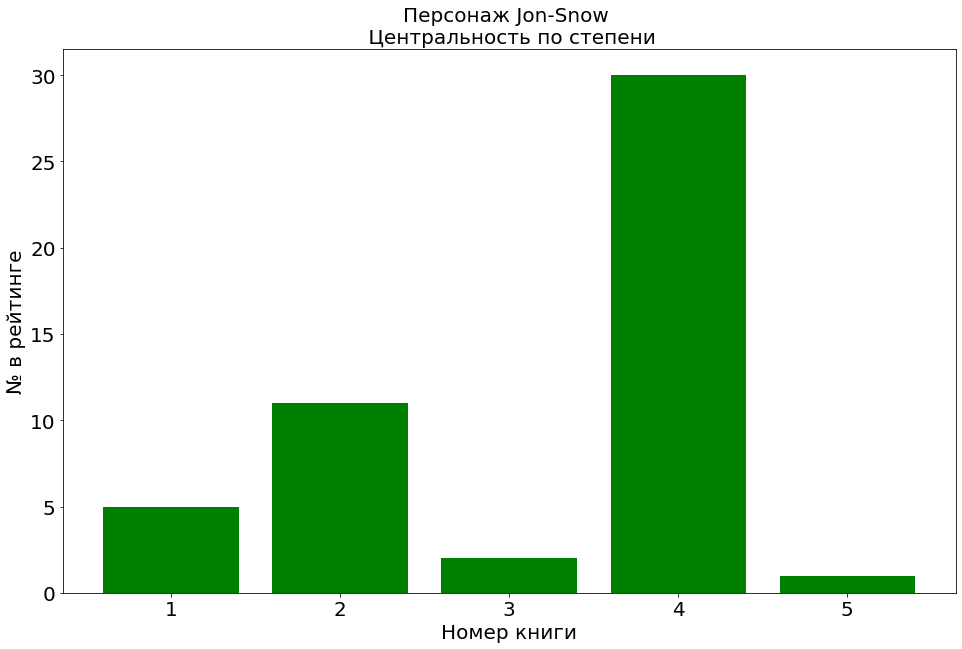

In [70]:
x = [1, 2, 3, 4, 5]
plt.figure(figsize=(16, 10))
plt.title('Персонаж Jon-Snow \n Центральность по степени', fontsize=20)
plt.bar(x, a, width=0.8, color = 'g')
plt.xlabel('Номер книги',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('№ в рейтинге',fontsize=20)
plt.show()

## График наоборот

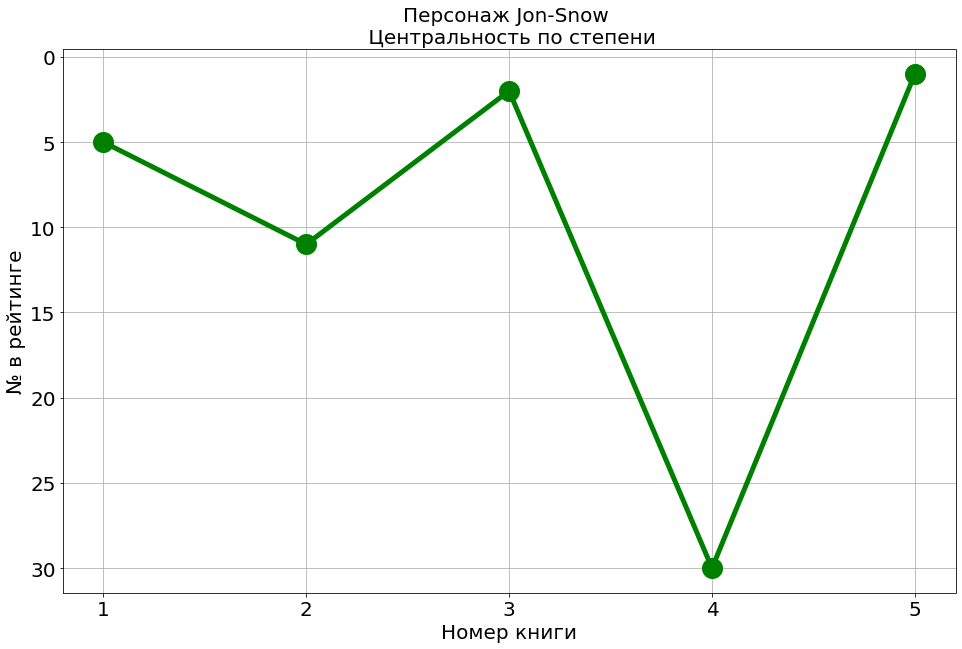

In [71]:
plt.figure(figsize=(16, 10))
plt.title('Персонаж Jon-Snow \n Центральность по степени', fontsize=20)
plt.plot(x, a, color = 'g', markersize=20, lw=5, marker="o")
plt.gca().invert_yaxis()
plt.xlabel('Номер книги',fontsize=20)
plt.xticks([1, 2, 3, 4, 5], fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('№ в рейтинге',fontsize=20)
plt.grid()
plt.show()

![](got.png)
![](got.png)
![](got.png)

#### 9. Кто из персонажей самый влиятельный? 
Постройте сеть, объединяющую сети по всем книгам. Постройте таблицу наиболее влиятельных персонажей в зависимости от выбранной метрики.


Начинаем джойнить таблицы

In [19]:
b1b2 = book1[['Source', 'Target', 'weight']].merge(book2[['Source', 'Target', 'weight']], how='outer', on=['Source','Target'])
b1b2.head()

,Source,Target,weight_x,weight_y
0,Addam-Marbrand,Jaime-Lannister,3.0,NaN
1,Addam-Marbrand,Tywin-Lannister,6.0,NaN
2,Aegon-I-Targaryen,Daenerys-Targaryen,5.0,NaN
3,Aegon-I-Targaryen,Eddard-Stark,4.0,NaN
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4.0,NaN


In [20]:
b2b3 = b1b2.merge(book3[['Source', 'Target', 'weight']], how='outer', on=['Source','Target'])
b2b3.head()

,Source,Target,weight_x,weight_y,weight
0,Addam-Marbrand,Jaime-Lannister,3.0,NaN,3.0
1,Addam-Marbrand,Tywin-Lannister,6.0,NaN,NaN
2,Aegon-I-Targaryen,Daenerys-Targaryen,5.0,NaN,4.0
3,Aegon-I-Targaryen,Eddard-Stark,4.0,NaN,NaN
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4.0,NaN,3.0


In [21]:
b3b4 = b2b3.merge(book4[['Source', 'Target', 'weight']], how='outer', on=['Source','Target'])
b3b4.head()

,Source,Target,weight_x,weight_y,weight_x,weight_y
0,Addam-Marbrand,Jaime-Lannister,3.0,NaN,3.0,8.0
1,Addam-Marbrand,Tywin-Lannister,6.0,NaN,NaN,NaN
2,Aegon-I-Targaryen,Daenerys-Targaryen,5.0,NaN,4.0,NaN
3,Aegon-I-Targaryen,Eddard-Stark,4.0,NaN,NaN,NaN
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4.0,NaN,3.0,NaN


In [22]:
b4b5 = b3b4.merge(book5[['Source', 'Target', 'weight']], how='outer', on=['Source','Target'])
b4b5.head()

,Source,Target,weight_x,weight_y,weight_x,weight_y,weight
0,Addam-Marbrand,Jaime-Lannister,3.0,NaN,3.0,8.0,NaN
1,Addam-Marbrand,Tywin-Lannister,6.0,NaN,NaN,NaN,NaN
2,Aegon-I-Targaryen,Daenerys-Targaryen,5.0,NaN,4.0,NaN,4.0
3,Aegon-I-Targaryen,Eddard-Stark,4.0,NaN,NaN,NaN,NaN
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4.0,NaN,3.0,NaN,NaN


In [44]:
b4b5["sum_weight"] = b4b5.drop(['Source', 'Target'], axis=1).sum(axis=1)
b4b5.head()

,Source,Target,weight_x,weight_y,weight_x,weight_y,weight,sum,sum_weight
0,Addam-Marbrand,Jaime-Lannister,3.0,NaN,3.0,8.0,NaN,14.0,28.0
1,Addam-Marbrand,Tywin-Lannister,6.0,NaN,NaN,NaN,NaN,6.0,12.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,5.0,NaN,4.0,NaN,4.0,13.0,26.0
3,Aegon-I-Targaryen,Eddard-Stark,4.0,NaN,NaN,NaN,NaN,4.0,8.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4.0,NaN,3.0,NaN,NaN,7.0,14.0


### Итоговая таблица для графа

In [45]:
book_together = b4b5[['Source', 'Target', 'sum_weight']]
book_together.head()

,Source,Target,sum_weight
0,Addam-Marbrand,Jaime-Lannister,28.0
1,Addam-Marbrand,Tywin-Lannister,12.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,26.0
3,Aegon-I-Targaryen,Eddard-Stark,8.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,14.0


In [46]:
G6=nx.from_pandas_edgelist(book_together,'Source', 'Target', edge_attr=True, create_using=nx.Graph())

In [48]:
character=[
    sorted_centrality(G6)[0][0],
    sorted(dict(G6.degree(weight='weight')).items(), key=itemgetter(1), reverse=True)[0][0],
    sorted(nx.eigenvector_centrality(G6).items(), key=itemgetter(1), reverse=True)[0][0],
    sorted(nx.pagerank(G6, alpha=0.85).items(), key=itemgetter(1), reverse=True)[0][0],
    sorted(nx.closeness_centrality(G6).items(), key=itemgetter(1), reverse=True)[0][0],
    sorted(nx.betweenness_centrality(G6).items(), key=itemgetter(1), reverse=True)[0][0]  
]

In [49]:
metrics=['degree centrality','weighted degree','eigenvector centrality',
         'PageRank','closeness centrality','betweenness centrality']

df = pd.DataFrame(columns=['centrality metrics', 'character'], index=list(np.arange(1,len(metrics)+1)))
df['centrality metrics']=metrics
df['character']=character

In [50]:
df

,centrality metrics,character
1,degree centrality,Tyrion-Lannister
2,weighted degree,Tyrion-Lannister
3,eigenvector centrality,Tyrion-Lannister
4,PageRank,Jon-Snow
5,closeness centrality,Tyrion-Lannister
6,betweenness centrality,Jon-Snow
